<a href="https://colab.research.google.com/github/jvataidee/ManualdeAnalisedeDadosPython/blob/master/cap7_teste_hipotese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**by: [João Ataíde](https://www.joaoataide.com)**
# **CAP 07: Teste Hipótese**

---



In [1]:
#importar bibliotecas
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency, spearmanr

Um problema das inferências estatísticas é o teste de hipótese, esse termo `hipótese estatítica` é uma "Suposição" sobre determinado parâmetros da população, como média, desvio, correlação e outros.

O `o teste de hipótese` é exatamente o procedimento para identificar a veracidade ou falsidade de determinada hipótese.


Uma variável $X$ associada a um determinado parâmetros $Θ$.

- Determinar a hipótese a ser analisada sobre o parâmetros (`Hipótese Nula`)
$H_0: θ = θ_0
$

- E em seguida a hipótese alternativa $H_1$


Fazendo isso chegamos o `Teste bilateral ou Bicaudal`

## **Teste unilateral à esquerda ou unicaldal**

$α$ é o nível de significância, basicamente é a probabilidade de rejeitar uma hipótese nula quando ela for verdadeira, podendo ter dois tipos de erro `RN` Região de Não Regeião e `RC` Região Crítica.

Hipotese alternativa seria,$H_1: θ \neq θ_0$.

Veja como seria o gráfico desse teste.



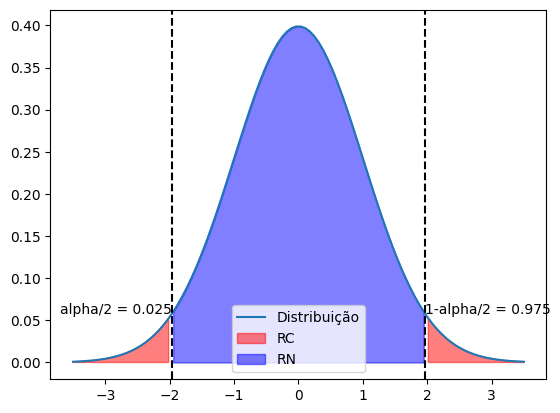

In [10]:
# Parâmetros
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma, 100)
alpha = 0.05

# Cria a distribuição normal
plt.plot(x, norm.pdf(x, mu, sigma))

# Adiciona as regiões de rejeição
low = norm.ppf(alpha/2)
high = norm.ppf(1 - alpha/2)
plt.fill_between(x, norm.pdf(x, mu, sigma),
                 where=(x<low) | (x>high), color='red', alpha=0.5)

# Adiciona a região de não rejeição
plt.fill_between(x, norm.pdf(x, mu, sigma),
                 where=(x>low) & (x<high), color='blue', alpha=0.5)

# Adiciona as linhas verticais para alpha/2 e 1-alpha/2
plt.axvline(low, color='black', linestyle='--')
plt.axvline(high, color='black', linestyle='--')

# Adiciona as anotações
plt.text(low, norm.pdf(low, mu, sigma), f'alpha/2 = {alpha/2}', ha='right')
plt.text(high, norm.pdf(high, mu, sigma), f'1-alpha/2 = {1-alpha/2}', ha='left')

# Adiciona as legendas
plt.legend([ "Distribuição",'RC', 'RN'])

# Mostra o gráfico
plt.show();

## **Teste unilateral ou unicaldal**

Usado para ver se o parâmetro e significativamente superior ou inferiro ao valor.

Hipotese alternativa a esquerda seria,

$H_1: θ < θ_0
$



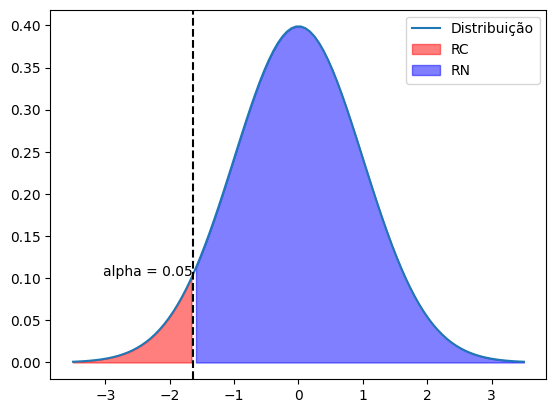

In [3]:
# Parâmetros
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma, 100)
alpha = 0.05

# Cria a distribuição normal
plt.plot(x, norm.pdf(x, mu, sigma))

# Adiciona a região de rejeição
low = norm.ppf(alpha)
plt.fill_between(x, norm.pdf(x, mu, sigma), where=(x<low), color='red', alpha=0.5)

# Adiciona a região de não rejeição
plt.fill_between(x, norm.pdf(x, mu, sigma), where=(x>=low), color='blue', alpha=0.5)

# Adiciona a linha vertical para alpha
plt.axvline(low, color='black', linestyle='--')

# Adiciona a anotação
plt.text(low, norm.pdf(low, mu, sigma), f'alpha = {alpha}', ha='right')

# Adiciona as legendas
plt.legend(["Distribuição",'RC', 'RN'])

# Mostra o gráfico
plt.show()

Hipotese alternativa a direita seria,

$H_1: θ > θ_0
$

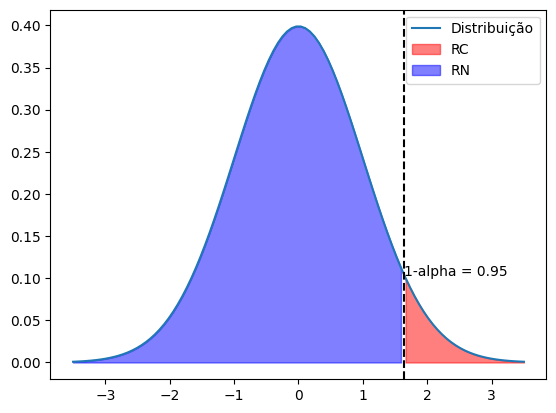

In [4]:
# Parâmetros
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma, 100)
alpha = 0.05

# Cria a distribuição normal
plt.plot(x, norm.pdf(x, mu, sigma))

# Adiciona a região de rejeição
high = norm.ppf(1 - alpha)
plt.fill_between(x, norm.pdf(x, mu, sigma), where=(x>high), color='red', alpha=0.5)

# Adiciona a região de não rejeição
plt.fill_between(x, norm.pdf(x, mu, sigma), where=(x<=high), color='blue', alpha=0.5)

# Adiciona a linha vertical para 1-alpha
plt.axvline(high, color='black', linestyle='--')

# Adiciona a anotação
plt.text(high, norm.pdf(high, mu, sigma), f'1-alpha = {1-alpha}', ha='left')

# Adiciona as legendas
plt.legend(["Distribuição",'RC', 'RN'])

# Mostra o gráfico
plt.show()

## **Tipos de Erros**

Definida as duas hipóteses usanod uma amostra probabilistica comprovamos ou não as hipóteses, gerando então dois tipos de erros:

- `Erro Tipo I` Rejeita a Hipóitese Nula quando for verdadeira

$P(E_I) = P(\text{rejeitar } H_0 \text{ | } H_0 \text{ é verdadeira}) = \alpha$

- `Erro Tipo II` Não Rejeita a hipótese nula quando for falsa.

$P(E_{II}) = P(\text{rejeitar } H_0 \text{ | } H_0 \text{ é falsa}) = \beta$
